In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/106words_DSLR_FH/'

In [3]:
CATEGORIES=np.load(load_path+'cat_106.npy', allow_pickle=True)

In [4]:
IMG_SIZE=128

In [5]:
cat_len=len(CATEGORIES)
print(cat_len)

106


# Save combined data npy

In [6]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = 'depthwise15_106words_dslr128'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [7]:
X=np.load(load_path+'X_dslr.npy', allow_pickle=True)
Y=np.load(load_path+'Y_dslr.npy', allow_pickle=True)

In [8]:
X = X.astype('float32')
X /= 255


In [9]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [10]:
del X,Y

In [11]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [12]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    # First layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fourth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fifth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Sixth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Seventh layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Eighth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Nineth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 10th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 11th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 12th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
   
    # Flatten the output from convolutional layers
    tf.keras.layers.Flatten(),
    
    # Add a dense layer to learn the final classification
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with softmax activation function for multi-class classification
    tf.keras.layers.Dense(106, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d (Depthwise  (None, 128, 128, 3)      30        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 3)      1

In [13]:
print('Training model 1')
opt = Adam(learning_rate=0.0001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 5, restore_best_weights = True)
# Compile the model with categorical crossentropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model1.summary()

history_const = model.fit(X_train, y_train,batch_size=100, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
487/487 [==============================] - 49s 92ms/step - loss: 4.6599 - accuracy: 0.0113 - val_loss: 4.6586 - val_accuracy: 0.0207
Epoch 2/1000
487/487 [==============================] - 43s 89ms/step - loss: 4.6439 - accuracy: 0.0131 - val_loss: 4.6337 - val_accuracy: 0.0501
Epoch 3/1000
487/487 [==============================] - 44s 90ms/step - loss: 4.6202 - accuracy: 0.0161 - val_loss: 4.6016 - val_accuracy: 0.0736
Epoch 4/1000
487/487 [==============================] - 44s 90ms/step - loss: 4.5879 - accuracy: 0.0196 - val_loss: 4.5538 - val_accuracy: 0.0929
Epoch 5/1000
487/487 [==============================] - 44s 90ms/step - loss: 4.5475 - accuracy: 0.0230 - val_loss: 4.4922 - val_accuracy: 0.1120
Epoch 6/1000
487/487 [==============================] - 44s 90ms/step - loss: 4.5003 - accuracy: 0.0318 - val_loss: 4.4200 - val_accuracy: 0.1343
Epoch 7/1000
487/487 [==============================] - 44s 91ms/step - loss: 4.4460 - accuracy: 0.0394 - v

Epoch 57/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.5888 - accuracy: 0.3080 - val_loss: 2.1466 - val_accuracy: 0.4500
Epoch 58/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.5648 - accuracy: 0.3124 - val_loss: 2.1262 - val_accuracy: 0.4540
Epoch 59/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.5643 - accuracy: 0.3180 - val_loss: 2.1116 - val_accuracy: 0.4579
Epoch 60/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.5386 - accuracy: 0.3175 - val_loss: 2.0903 - val_accuracy: 0.4623
Epoch 61/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.5163 - accuracy: 0.3247 - val_loss: 2.0719 - val_accuracy: 0.4657
Epoch 62/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.4955 - accuracy: 0.3266 - val_loss: 2.0515 - val_accuracy: 0.4704
Epoch 63/1000
487/487 [==============================] - 44s 91ms/step - loss: 2.4818 - accuracy: 0.3309 - val_loss: 2

487/487 [==============================] - 44s 91ms/step - loss: 1.7578 - accuracy: 0.4926 - val_loss: 1.3403 - val_accuracy: 0.6305
Epoch 113/1000
487/487 [==============================] - 44s 91ms/step - loss: 1.7504 - accuracy: 0.4923 - val_loss: 1.3311 - val_accuracy: 0.6323
Epoch 114/1000
487/487 [==============================] - 44s 91ms/step - loss: 1.7352 - accuracy: 0.4976 - val_loss: 1.3215 - val_accuracy: 0.6348
Epoch 115/1000
487/487 [==============================] - 44s 91ms/step - loss: 1.7216 - accuracy: 0.5003 - val_loss: 1.3096 - val_accuracy: 0.6374
Epoch 116/1000
487/487 [==============================] - 44s 91ms/step - loss: 1.7148 - accuracy: 0.5018 - val_loss: 1.3013 - val_accuracy: 0.6402
Epoch 117/1000
487/487 [==============================] - 44s 91ms/step - loss: 1.7079 - accuracy: 0.4969 - val_loss: 1.2914 - val_accuracy: 0.6421
Epoch 118/1000
487/487 [==============================] - 44s 91ms/step - loss: 1.6992 - accuracy: 0.5047 - val_loss: 1.2831 - 

487/487 [==============================] - 45s 92ms/step - loss: 1.3091 - accuracy: 0.6034 - val_loss: 0.9202 - val_accuracy: 0.7448
Epoch 168/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.2966 - accuracy: 0.6091 - val_loss: 0.9142 - val_accuracy: 0.7469
Epoch 169/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.2956 - accuracy: 0.6061 - val_loss: 0.9105 - val_accuracy: 0.7479
Epoch 170/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.2894 - accuracy: 0.6061 - val_loss: 0.9040 - val_accuracy: 0.7508
Epoch 171/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.2797 - accuracy: 0.6110 - val_loss: 0.8954 - val_accuracy: 0.7520
Epoch 172/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.2788 - accuracy: 0.6122 - val_loss: 0.8914 - val_accuracy: 0.7525
Epoch 173/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.2641 - accuracy: 0.6186 - val_loss: 0.8819 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.9983 - accuracy: 0.6898 - val_loss: 0.6530 - val_accuracy: 0.8158
Epoch 223/1000
487/487 [==============================] - 45s 92ms/step - loss: 1.0039 - accuracy: 0.6906 - val_loss: 0.6486 - val_accuracy: 0.8177
Epoch 224/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.9916 - accuracy: 0.6899 - val_loss: 0.6447 - val_accuracy: 0.8202
Epoch 225/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.9965 - accuracy: 0.6909 - val_loss: 0.6432 - val_accuracy: 0.8216
Epoch 226/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.9896 - accuracy: 0.6950 - val_loss: 0.6379 - val_accuracy: 0.8220
Epoch 227/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.9922 - accuracy: 0.6905 - val_loss: 0.6348 - val_accuracy: 0.8228
Epoch 228/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.9758 - accuracy: 0.7021 - val_loss: 0.6295 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.7963 - accuracy: 0.7471 - val_loss: 0.4817 - val_accuracy: 0.8663
Epoch 278/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.8078 - accuracy: 0.7456 - val_loss: 0.4813 - val_accuracy: 0.8675
Epoch 279/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.7967 - accuracy: 0.7490 - val_loss: 0.4798 - val_accuracy: 0.8675
Epoch 280/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.7905 - accuracy: 0.7491 - val_loss: 0.4757 - val_accuracy: 0.8677
Epoch 281/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.7968 - accuracy: 0.7497 - val_loss: 0.4738 - val_accuracy: 0.8683
Epoch 282/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.7860 - accuracy: 0.7496 - val_loss: 0.4698 - val_accuracy: 0.8693
Epoch 283/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.7937 - accuracy: 0.7485 - val_loss: 0.4688 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.6536 - accuracy: 0.7910 - val_loss: 0.3704 - val_accuracy: 0.8976
Epoch 333/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.6634 - accuracy: 0.7869 - val_loss: 0.3684 - val_accuracy: 0.8976
Epoch 334/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.6594 - accuracy: 0.7890 - val_loss: 0.3674 - val_accuracy: 0.8976
Epoch 335/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.6610 - accuracy: 0.7903 - val_loss: 0.3664 - val_accuracy: 0.8981
Epoch 336/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.6462 - accuracy: 0.7916 - val_loss: 0.3637 - val_accuracy: 0.8977
Epoch 337/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.6486 - accuracy: 0.7931 - val_loss: 0.3606 - val_accuracy: 0.8984
Epoch 338/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.6463 - accuracy: 0.7948 - val_loss: 0.3619 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.5620 - accuracy: 0.8195 - val_loss: 0.2928 - val_accuracy: 0.9188
Epoch 388/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.5561 - accuracy: 0.8213 - val_loss: 0.2911 - val_accuracy: 0.9187
Epoch 389/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.5561 - accuracy: 0.8225 - val_loss: 0.2899 - val_accuracy: 0.9186
Epoch 390/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.5447 - accuracy: 0.8228 - val_loss: 0.2895 - val_accuracy: 0.9183
Epoch 391/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.5403 - accuracy: 0.8245 - val_loss: 0.2860 - val_accuracy: 0.9198
Epoch 392/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.5525 - accuracy: 0.8217 - val_loss: 0.2855 - val_accuracy: 0.9202
Epoch 393/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.5435 - accuracy: 0.8227 - val_loss: 0.2859 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.4853 - accuracy: 0.8425 - val_loss: 0.2391 - val_accuracy: 0.9342
Epoch 443/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4763 - accuracy: 0.8452 - val_loss: 0.2359 - val_accuracy: 0.9347
Epoch 444/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4802 - accuracy: 0.8439 - val_loss: 0.2355 - val_accuracy: 0.9348
Epoch 445/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4809 - accuracy: 0.8458 - val_loss: 0.2353 - val_accuracy: 0.9356
Epoch 446/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4797 - accuracy: 0.8460 - val_loss: 0.2332 - val_accuracy: 0.9358
Epoch 447/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.4747 - accuracy: 0.8473 - val_loss: 0.2325 - val_accuracy: 0.9353
Epoch 448/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4686 - accuracy: 0.8496 - val_loss: 0.2318 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.4170 - accuracy: 0.8652 - val_loss: 0.1975 - val_accuracy: 0.9456
Epoch 498/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4151 - accuracy: 0.8670 - val_loss: 0.1974 - val_accuracy: 0.9449
Epoch 499/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4161 - accuracy: 0.8646 - val_loss: 0.1961 - val_accuracy: 0.9452
Epoch 500/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4082 - accuracy: 0.8678 - val_loss: 0.1949 - val_accuracy: 0.9452
Epoch 501/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4162 - accuracy: 0.8646 - val_loss: 0.1940 - val_accuracy: 0.9459
Epoch 502/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4099 - accuracy: 0.8672 - val_loss: 0.1942 - val_accuracy: 0.9465
Epoch 503/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.4171 - accuracy: 0.8652 - val_loss: 0.1931 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.3749 - accuracy: 0.8776 - val_loss: 0.1670 - val_accuracy: 0.9531
Epoch 553/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3656 - accuracy: 0.8808 - val_loss: 0.1663 - val_accuracy: 0.9530
Epoch 554/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3677 - accuracy: 0.8807 - val_loss: 0.1657 - val_accuracy: 0.9530
Epoch 555/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3686 - accuracy: 0.8784 - val_loss: 0.1667 - val_accuracy: 0.9524
Epoch 556/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3716 - accuracy: 0.8765 - val_loss: 0.1659 - val_accuracy: 0.9531
Epoch 557/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3648 - accuracy: 0.8843 - val_loss: 0.1655 - val_accuracy: 0.9533
Epoch 558/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3649 - accuracy: 0.8834 - val_loss: 0.1647 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.3341 - accuracy: 0.8916 - val_loss: 0.1439 - val_accuracy: 0.9587
Epoch 608/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3239 - accuracy: 0.8918 - val_loss: 0.1442 - val_accuracy: 0.9594
Epoch 609/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3307 - accuracy: 0.8938 - val_loss: 0.1436 - val_accuracy: 0.9586
Epoch 610/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.3289 - accuracy: 0.8936 - val_loss: 0.1437 - val_accuracy: 0.9583
Epoch 611/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3257 - accuracy: 0.8945 - val_loss: 0.1431 - val_accuracy: 0.9584
Epoch 612/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3269 - accuracy: 0.8927 - val_loss: 0.1428 - val_accuracy: 0.9588
Epoch 613/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3307 - accuracy: 0.8934 - val_loss: 0.1417 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.2919 - accuracy: 0.9052 - val_loss: 0.1263 - val_accuracy: 0.9643
Epoch 663/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2980 - accuracy: 0.9005 - val_loss: 0.1267 - val_accuracy: 0.9637
Epoch 664/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2998 - accuracy: 0.9040 - val_loss: 0.1258 - val_accuracy: 0.9640
Epoch 665/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2967 - accuracy: 0.9050 - val_loss: 0.1255 - val_accuracy: 0.9649
Epoch 666/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2889 - accuracy: 0.9041 - val_loss: 0.1244 - val_accuracy: 0.9641
Epoch 667/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2933 - accuracy: 0.9040 - val_loss: 0.1252 - val_accuracy: 0.9646
Epoch 668/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.3060 - accuracy: 0.9008 - val_loss: 0.1254 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.2686 - accuracy: 0.9120 - val_loss: 0.1130 - val_accuracy: 0.9683
Epoch 718/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2720 - accuracy: 0.9105 - val_loss: 0.1127 - val_accuracy: 0.9676
Epoch 719/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2648 - accuracy: 0.9129 - val_loss: 0.1121 - val_accuracy: 0.9680
Epoch 720/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.2719 - accuracy: 0.9111 - val_loss: 0.1123 - val_accuracy: 0.9679
Epoch 721/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2686 - accuracy: 0.9109 - val_loss: 0.1118 - val_accuracy: 0.9685
Epoch 722/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2675 - accuracy: 0.9127 - val_loss: 0.1122 - val_accuracy: 0.9688
Epoch 723/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2626 - accuracy: 0.9153 - val_loss: 0.1125 - 

487/487 [==============================] - 45s 91ms/step - loss: 0.2425 - accuracy: 0.9225 - val_loss: 0.1016 - val_accuracy: 0.9714
Epoch 773/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.2496 - accuracy: 0.9213 - val_loss: 0.1020 - val_accuracy: 0.9709
Epoch 774/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.2448 - accuracy: 0.9187 - val_loss: 0.1009 - val_accuracy: 0.9714
Epoch 775/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2474 - accuracy: 0.9185 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 776/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2406 - accuracy: 0.9208 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 777/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2404 - accuracy: 0.9206 - val_loss: 0.0995 - val_accuracy: 0.9713
Epoch 778/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2421 - accuracy: 0.9203 - val_loss: 0.0998 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.2272 - accuracy: 0.9271 - val_loss: 0.0914 - val_accuracy: 0.9740
Epoch 828/1000
487/487 [==============================] - 45s 91ms/step - loss: 0.2316 - accuracy: 0.9235 - val_loss: 0.0916 - val_accuracy: 0.9745
Epoch 829/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2294 - accuracy: 0.9245 - val_loss: 0.0917 - val_accuracy: 0.9755
Epoch 830/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2257 - accuracy: 0.9278 - val_loss: 0.0914 - val_accuracy: 0.9743
Epoch 831/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2237 - accuracy: 0.9262 - val_loss: 0.0914 - val_accuracy: 0.9746
Epoch 832/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2199 - accuracy: 0.9275 - val_loss: 0.0906 - val_accuracy: 0.9742
Epoch 833/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2259 - accuracy: 0.9251 - val_loss: 0.0912 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.2095 - accuracy: 0.9316 - val_loss: 0.0836 - val_accuracy: 0.9771
Epoch 883/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2050 - accuracy: 0.9335 - val_loss: 0.0836 - val_accuracy: 0.9771
Epoch 884/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2107 - accuracy: 0.9330 - val_loss: 0.0831 - val_accuracy: 0.9777
Epoch 885/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2041 - accuracy: 0.9336 - val_loss: 0.0829 - val_accuracy: 0.9775
Epoch 886/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2079 - accuracy: 0.9296 - val_loss: 0.0830 - val_accuracy: 0.9765
Epoch 887/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2024 - accuracy: 0.9343 - val_loss: 0.0831 - val_accuracy: 0.9765
Epoch 888/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.2134 - accuracy: 0.9288 - val_loss: 0.0830 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.1936 - accuracy: 0.9378 - val_loss: 0.0771 - val_accuracy: 0.9781
Epoch 938/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1929 - accuracy: 0.9383 - val_loss: 0.0775 - val_accuracy: 0.9786
Epoch 939/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1929 - accuracy: 0.9368 - val_loss: 0.0765 - val_accuracy: 0.9788
Epoch 940/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1960 - accuracy: 0.9355 - val_loss: 0.0765 - val_accuracy: 0.9788
Epoch 941/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1966 - accuracy: 0.9348 - val_loss: 0.0770 - val_accuracy: 0.9788
Epoch 942/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1899 - accuracy: 0.9376 - val_loss: 0.0767 - val_accuracy: 0.9780
Epoch 943/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1965 - accuracy: 0.9365 - val_loss: 0.0764 - 

487/487 [==============================] - 45s 92ms/step - loss: 0.1822 - accuracy: 0.9417 - val_loss: 0.0718 - val_accuracy: 0.9804
Epoch 993/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1787 - accuracy: 0.9431 - val_loss: 0.0714 - val_accuracy: 0.9803
Epoch 994/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1818 - accuracy: 0.9421 - val_loss: 0.0712 - val_accuracy: 0.9801
Epoch 995/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1778 - accuracy: 0.9406 - val_loss: 0.0710 - val_accuracy: 0.9805
Epoch 996/1000
487/487 [==============================] - 44s 91ms/step - loss: 0.1809 - accuracy: 0.9406 - val_loss: 0.0705 - val_accuracy: 0.9810
Epoch 997/1000
487/487 [==============================] - 45s 92ms/step - loss: 0.1801 - accuracy: 0.9404 - val_loss: 0.0716 - val_accuracy: 0.9806
Epoch 998/1000
487/487 [==============================] - 46s 94ms/step - loss: 0.1824 - accuracy: 0.9397 - val_loss: 0.0710 - 

In [16]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model.save(load_path+model_name1+'_model.h5') 
print("saved")

Saving
saved


In [7]:
# #load saved history
history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# #load saved model
model1=load_model(load_path+model_name1+'_model.h5')

print("loaded")

loaded


Plots


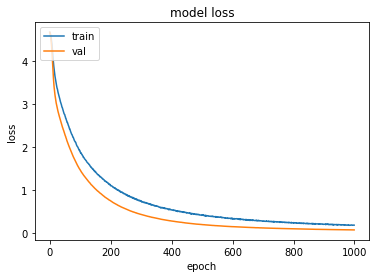

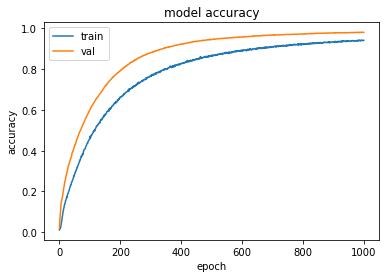

In [17]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

In [ ]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (200, 100)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


In [ ]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

In [ ]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

# Colourful mediapipe testing with VA_create_3.0

In [8]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [9]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  
cls='R'
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        #webcam
        img_array = img_array[:, 80:560, :]
        #dslr
#         img_array = cv2.resize(img_array[:, 224:800, :],(480,480))
        
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X,verbose=0)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
#             if CATEGORIES[np.argmax(Y)]==cls:
            if np.max(Y)>0.8:
                cv2.imwrite(load_path+'/99.79_misc_rajesh/mp_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',image)
                cv2.imwrite(load_path+'/99.79_misc_rajesh/ori_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',img_array)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()